In [1]:
import numpy as np
import torch as th
import pickle
from torch.autograd import Variable
from collections import defaultdict as ddict
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

### Plot graphs with features

(409, 6)


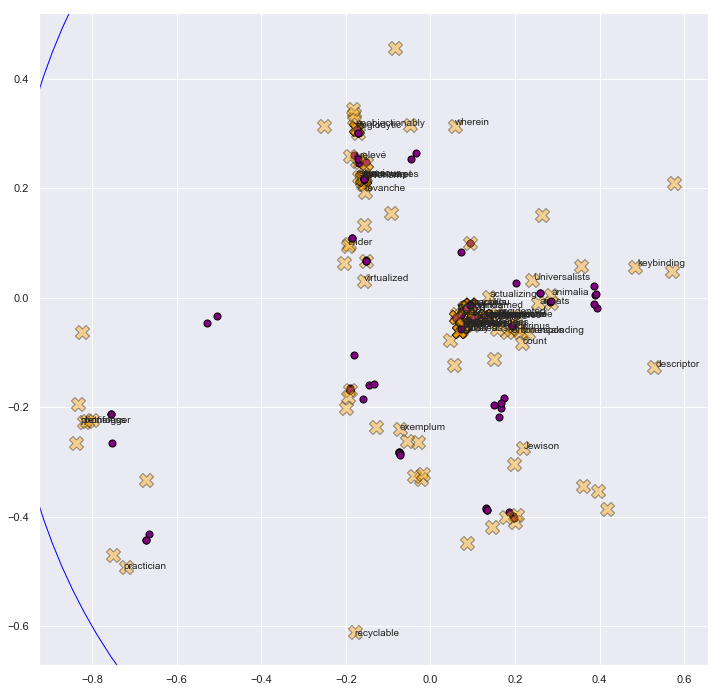

In [12]:
model = th.load('../data/synth_instances.pth')
embed = model['model']['lt.weight'].numpy()
print(embed.shape)
colors = np.zeros(embed.shape[0])
for idx in range(len(colors)):
    if model['objects'][idx]['feature'] == -1:
        colors[idx] = 1
    else:
        colors[idx] = -1

plt.figure(figsize=(12,12))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,4]
    y = embed[idx,5]
    
    if model['objects'][idx]['feature'] == -1:
        fsize = 10
        size = 200
        displacement = 1.01
        marker = 'X'
        color = 'orange'
        a=0.4
    else:
        fsize = 7
        size = 200
        displacement = -1.01
        marker = '.'
        color= 'purple'
        a=1
    ax.scatter(x=x, y=y, c=color, alpha=a, s=size, edgecolor='black', marker=marker, )
    if model['objects'][idx]['feature'] == -1 and (np.random.random() > 0.7 or model['objects'][idx]['name'] == 'root'):
        #print(x,y)
        if model['objects'][idx]['name'] == 'root': fsize = 18
        plt.text(x * ( displacement), y * ( displacement) , model['objects'][idx]['name'], fontsize=fsize)

ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()

### Plot simple graphs without features

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'

Embedding matrix shape: (101, 6)


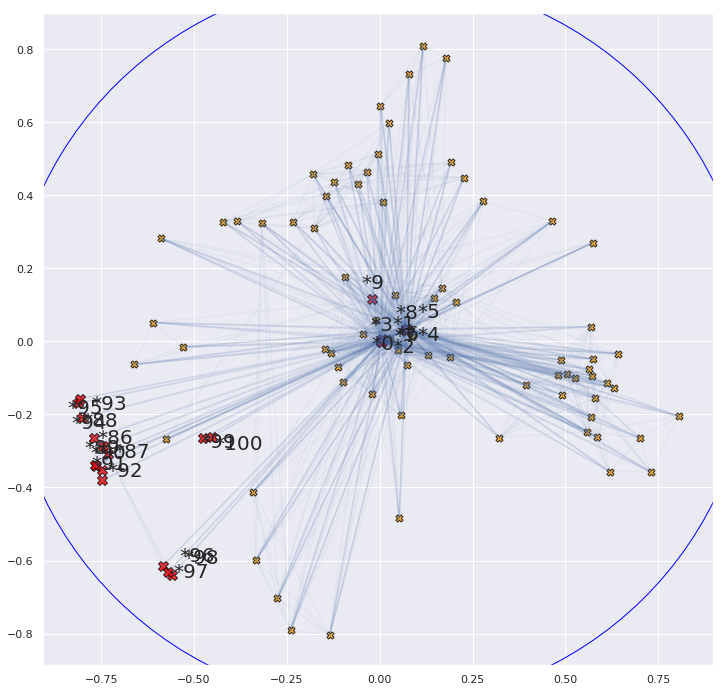

In [15]:
np.random.seed(7)
d0 = 4
d1 = 5

filepath = '../data/toy_simple.pth'
graphpath =  filepath[:-4] + '_graph.p'
model = th.load('../data/toy_simple.pth')
graph = pickle.load(open(graphpath, 'rb'))
edges = graph['edges']
embed = model['model']['lt.weight'].numpy()
print("Embedding matrix shape:", embed.shape)
colors = np.zeros(len(model['objects']))
plt.figure(figsize=(12,12))
ax = plt.gca()
for idx in range(len(model['objects'])):
    x = embed[idx,d0]
    y = embed[idx,d1]
    
    fsize = 20
    size = 200
    displacement = np.zeros(2)
    marker = 'X'
    color = 'orange'

    rootest = [str(x) for x in np.arange(10)] + [str(x) for x in np.arange(86, 101)]
    if model['objects'][idx] in rootest:
        displacement+= np.sign(np.random.random(2) - 0.5) * 0.03
        size = 100
        color='red'
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)

        plt.text(x + ( displacement[0]), y + ( displacement[1]) , '*'+model['objects'][idx], fontsize=fsize)

    else:
        size=50
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)
        
for edge in edges:

    x0 = embed[edge[0], d0]
    y0 = embed[edge[0], d1]

    x1 = embed[edge[1], d0]
    y1 = embed[edge[1], d1]

    plt.plot([x0, x1], [y0, y1], 'b', alpha=0.05)

ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()

In [32]:
graph.keys()

dict_keys(['objects', 'edges'])